In [1]:
import json
import csv
import tweepy
import re
import nltk
from nltk.stem import WordNetLemmatizer
import pandas as pd
import GetOldTweets3 as got
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from textwrap import wrap
import plotly_express as px

In [2]:
# Set default fontsize and colors for graphs
SMALL_SIZE, MEDIUM_SIZE, BIG_SIZE = 10, 12, 20
plt.rc('font', size=MEDIUM_SIZE)       
plt.rc('axes', titlesize=BIG_SIZE)     
plt.rc('axes', labelsize=MEDIUM_SIZE)  
plt.rc('xtick', labelsize=MEDIUM_SIZE) 
plt.rc('ytick', labelsize=MEDIUM_SIZE) 
plt.rc('legend', fontsize=SMALL_SIZE)  
plt.rc('figure', titlesize=BIG_SIZE)
my_colors = 'rgbkymc'

# Disable scrolling for long output
from IPython.display import display, Javascript
disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

In [3]:
df=pd.read_csv('final_pesu.csv')
wn = nltk.WordNetLemmatizer()
df=df.drop(columns="Unnamed: 0")
df

,text,username,tweet_id,timestamp,hashtags,screen_name,retweets,uni_handle,compound,Sentiment
0,Here it is a full link of Nerpada pesu @PTTVOn...,SURIYA FANS CLUB -SALEM,1150816351470010368,2019-07-15 17:16:13,['SuriyaFCWarnsBJPnADMKhttps'],Salem_sfc_offl,6,0.0,0.0000,Neutral
1,"• Guys, here is the tag #SuriyaFCWarnsBJPnADM...",®anjith SF©™✈Soorarai Pottru,1150766936008978432,2019-07-15 13:59:52,"['SuriyaFCWarnsBJPnADMK', 'Kadamboor']",Ranjith_SFC,47,0.0,-0.4184,Negative
2,@karthickselvaa hope will discuss about this p...,Kanthi Mathi Nathan,1150705572649394176,2019-07-15 09:56:02,[],kanthi90,0,0.0,0.4404,Positive
3,Speak a few words friendly to Meera during her...,Kiddy Vijay,1150620271717449728,2019-07-15 04:17:04,['BiggBossTamil3'],KiddyVijay,0,0.0,0.9656,Positive
4,What were you doing at MCdonlad ? Lootay huy p...,Sohail Shami,1150102123356610560,2019-07-13 17:58:08,[],engineersohail3,0,0.0,0.0000,Neutral
5,Here it is a full link of Nerpada pesu @PTTVOn...,SURIYA FANS CLUB -SALEM,1150816351470010368,2019-07-15 17:16:13,['SuriyaFCWarnsBJPnADMKhttps'],Salem_sfc_offl,6,0.0,0.0000,Neutral
6,"• Guys, here is the tag #SuriyaFCWarnsBJPnADM...",®anjith SF©™✈Soorarai Pottru,1150766936008978432,2019-07-15 13:59:52,"['SuriyaFCWarnsBJPnADMK', 'Kadamboor']",Ranjith_SFC,47,0.0,-0.4184,Negative
7,@karthickselvaa hope will discuss about this p...,Kanthi Mathi Nathan,1150705572649394176,2019-07-15 09:56:02,[],kanthi90,0,0.0,0.4404,Positive
8,Speak a few words friendly to Meera during her...,Kiddy Vijay,1150620271717449728,2019-07-15 04:17:04,['BiggBossTamil3'],KiddyVijay,0,0.0,0.9656,Positive
9,What were you doing at MCdonlad ? Lootay huy p...,Sohail Shami,1150102123356610560,2019-07-13 17:58:08,[],engineersohail3,0,0.0,0.0000,Neutral


In [4]:
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 935 entries, 0 to 1854
Data columns (total 10 columns):
text           935 non-null object
username       935 non-null object
tweet_id       935 non-null int64
timestamp      935 non-null object
hashtags       935 non-null object
screen_name    935 non-null object
retweets       935 non-null int64
uni_handle     935 non-null float64
compound       935 non-null float64
Sentiment      935 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 80.4+ KB


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'], infer_datetime_format = "%d/%m/%Y", utc  = False)

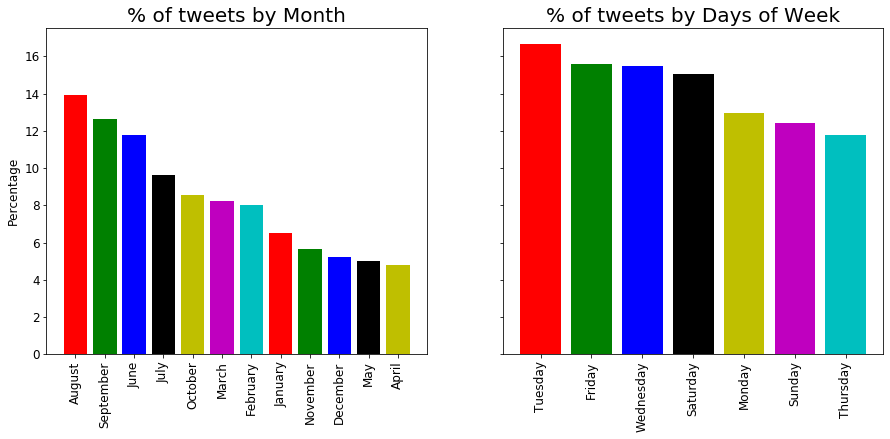

In [6]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
df["monthName"] = df.timestamp.dt.month_name()
data = df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of tweets by Month')

df["dayName"] = df.timestamp.dt.day_name()
data = df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of tweets by Days of Week')

plt.show()

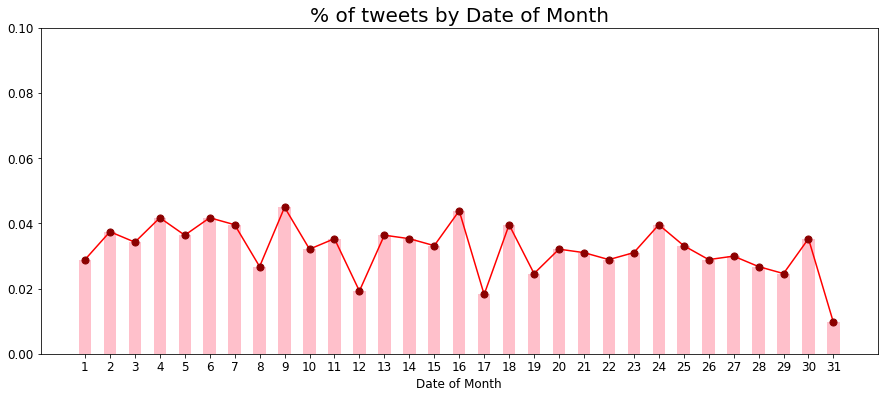

In [8]:
fig, axes = plt.subplots(figsize=(15,6))
df["dayOfMonth"] = df.timestamp.dt.day
data = df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month')

plt.show()

In [9]:
import string
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    nopunc = re.sub('((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))', '', text_rc) #remove urls
    nopunc = re.sub(r'http\S+', '', nopunc) #remove usernames
    nopunc = re.sub(r'#([^\s]+)', r'\1', nopunc) #remove hashtags
    nopunc= re.sub(r'(.)\1+', r'\1\1', nopunc)  #remove repeating characters 
    tokens = re.split('\W+', nopunc)    # tokenization
    text = [word for word in tokens if word not in stopwords]  # remove stopwords and stemming
    return text
df['Text_cleaned'] = df['text'].apply(lambda x: clean_text(x))

In [10]:
def lemmatizer(text):
    text = [wn.lemmatize(word) for word in text]
    return text
df['Text_lemmatized'] = df['Text_cleaned'].apply(lambda x: lemmatizer(x))

def listtostr(s):
    str1=" "
    return (str1.join(s))
df['Text_lemmatized_str'] = df['Text_lemmatized'].apply(lambda x: listtostr(x))
df.head()

,text,username,tweet_id,timestamp,hashtags,screen_name,retweets,uni_handle,compound,Sentiment,monthName,dayName,dayOfMonth,Text_cleaned,Text_lemmatized,Text_lemmatized_str
0,Here it is a full link of Nerpada pesu @PTTVOn...,SURIYA FANS CLUB -SALEM,1150816351470010368,2019-07-15 17:16:13,['SuriyaFCWarnsBJPnADMKhttps'],Salem_sfc_offl,6,0.0,0.0000,Neutral,July,Monday,15,"[full, link, nerpada, pesu, pttvonlinenews, ch...","[full, link, nerpada, pesu, pttvonlinenews, ch...",full link nerpada pesu pttvonlinenews chief su...
1,"• Guys, here is the tag #SuriyaFCWarnsBJPnADM...",®anjith SF©™✈Soorarai Pottru,1150766936008978432,2019-07-15 13:59:52,"['SuriyaFCWarnsBJPnADMK', 'Kadamboor']",Ranjith_SFC,47,0.0,-0.4184,Negative,July,Monday,15,"[, guys, tag, suriyafcwarnsbjpnadmk, every, ci...","[, guy, tag, suriyafcwarnsbjpnadmk, every, cit...",guy tag suriyafcwarnsbjpnadmk every citizen r...
2,@karthickselvaa hope will discuss about this p...,Kanthi Mathi Nathan,1150705572649394176,2019-07-15 09:56:02,[],kanthi90,0,0.0,0.4404,Positive,July,Monday,15,"[karthickselvaa, hope, discuss, program, namec...","[karthickselvaa, hope, discus, program, nameca...",karthickselvaa hope discus program namecalled ...
3,Speak a few words friendly to Meera during her...,Kiddy Vijay,1150620271717449728,2019-07-15 04:17:04,['BiggBossTamil3'],KiddyVijay,0,0.0,0.9656,Positive,July,Monday,15,"[speak, words, friendly, meera, paris, corner,...","[speak, word, friendly, meera, paris, corner, ...",speak word friendly meera paris corner time ge...
4,What were you doing at MCdonlad ? Lootay huy p...,Sohail Shami,1150102123356610560,2019-07-13 17:58:08,[],engineersohail3,0,0.0,0.0000,Neutral,July,Saturday,13,"[mcdonlad, lootay, huy, pesu, k, kha, rhay, ho, ]","[mcdonlad, lootay, huy, pesu, k, kha, rhay, ho, ]",mcdonlad lootay huy pesu k kha rhay ho


In [11]:
pos_df = df[df.Sentiment == 'Positive']
neg_df = df[df.Sentiment == 'Negative']
neu_df = df[df.Sentiment == 'Neutral']

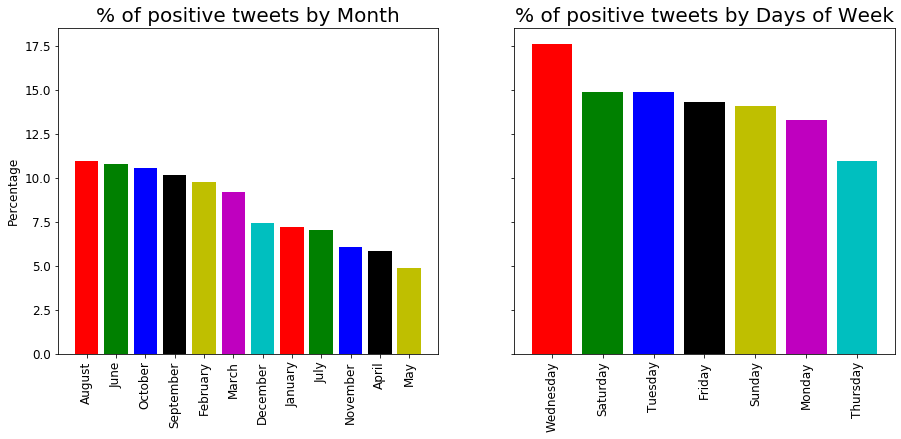

In [12]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = pos_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of positive tweets by Month')

data = pos_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of positive tweets by Days of Week')

plt.show()

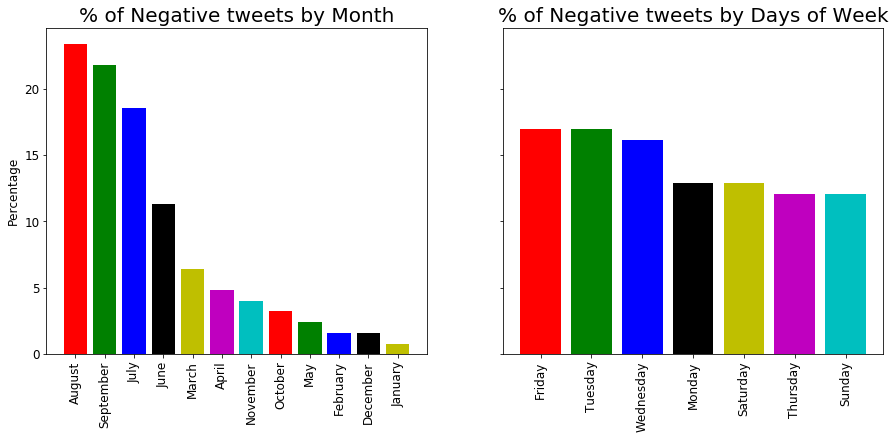

In [13]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neg_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Negative tweets by Month')

data = neg_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Negative tweets by Days of Week')

plt.show()

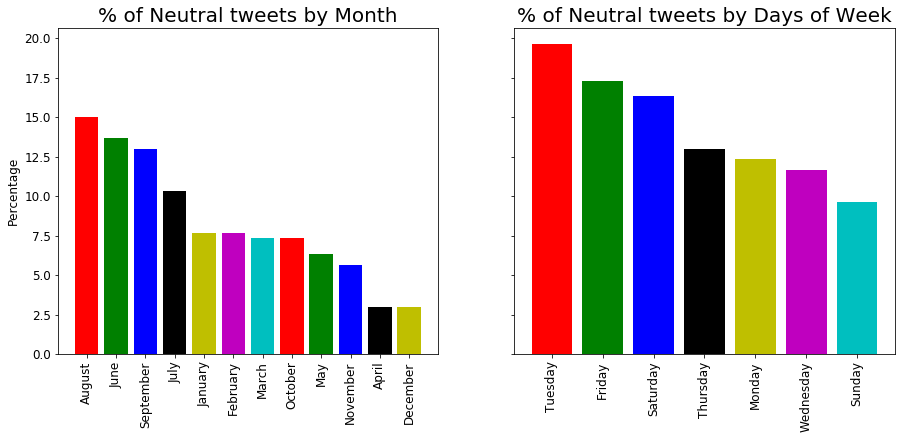

In [14]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
data = neu_df["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neutral tweets by Month')

data = neu_df["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neutral tweets by Days of Week')

plt.show()

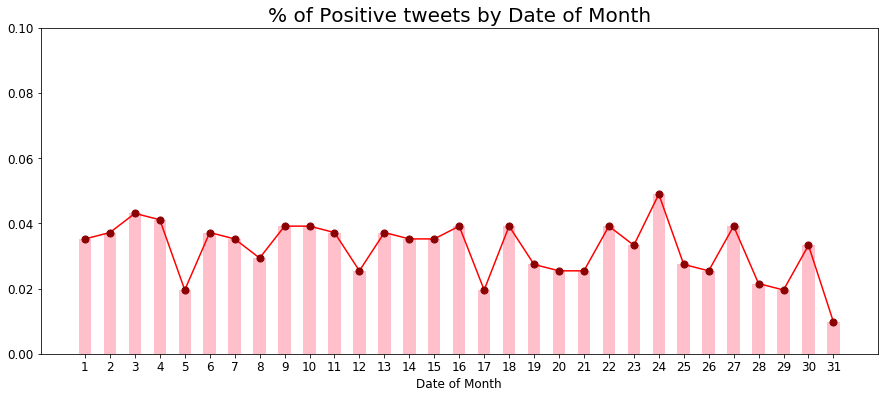

In [17]:
fig, axes = plt.subplots(figsize=(15,6))
data = pos_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Positive tweets by Date of Month')

plt.show()

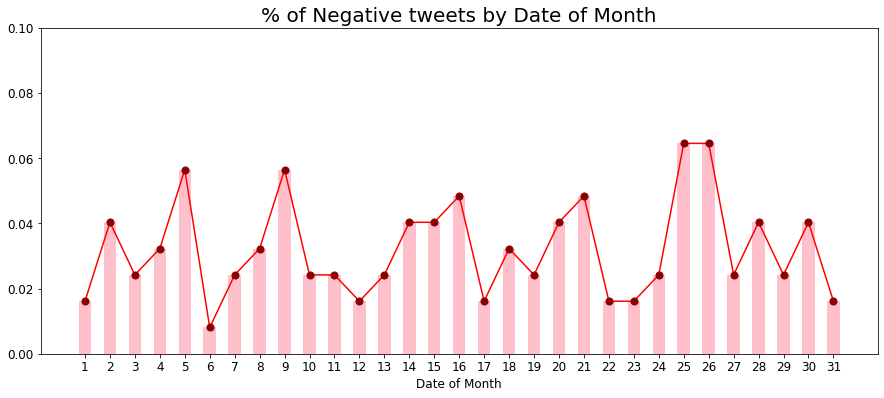

In [18]:
fig, axes = plt.subplots(figsize=(15,6))
data = neg_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Negative tweets by Date of Month')

plt.show()

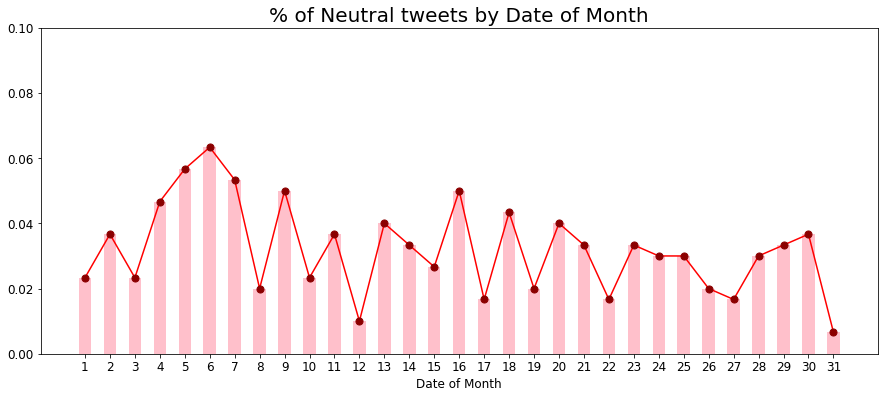

In [19]:
fig, axes = plt.subplots(figsize=(15,6))
data = neu_df["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of Neutral tweets by Date of Month')

plt.show()

In [20]:
df["year"] = df.timestamp.dt.year
df_2019=df[df.year==2019]
df_2020=df[df.year==2020]
df

,text,username,tweet_id,timestamp,hashtags,screen_name,retweets,uni_handle,compound,Sentiment,monthName,dayName,dayOfMonth,Text_cleaned,Text_lemmatized,Text_lemmatized_str,year
0,Here it is a full link of Nerpada pesu @PTTVOn...,SURIYA FANS CLUB -SALEM,1150816351470010368,2019-07-15 17:16:13,['SuriyaFCWarnsBJPnADMKhttps'],Salem_sfc_offl,6,0.0,0.0000,Neutral,July,Monday,15,"[full, link, nerpada, pesu, pttvonlinenews, ch...","[full, link, nerpada, pesu, pttvonlinenews, ch...",full link nerpada pesu pttvonlinenews chief su...,2019
1,"• Guys, here is the tag #SuriyaFCWarnsBJPnADM...",®anjith SF©™✈Soorarai Pottru,1150766936008978432,2019-07-15 13:59:52,"['SuriyaFCWarnsBJPnADMK', 'Kadamboor']",Ranjith_SFC,47,0.0,-0.4184,Negative,July,Monday,15,"[, guys, tag, suriyafcwarnsbjpnadmk, every, ci...","[, guy, tag, suriyafcwarnsbjpnadmk, every, cit...",guy tag suriyafcwarnsbjpnadmk every citizen r...,2019
2,@karthickselvaa hope will discuss about this p...,Kanthi Mathi Nathan,1150705572649394176,2019-07-15 09:56:02,[],kanthi90,0,0.0,0.4404,Positive,July,Monday,15,"[karthickselvaa, hope, discuss, program, namec...","[karthickselvaa, hope, discus, program, nameca...",karthickselvaa hope discus program namecalled ...,2019
3,Speak a few words friendly to Meera during her...,Kiddy Vijay,1150620271717449728,2019-07-15 04:17:04,['BiggBossTamil3'],KiddyVijay,0,0.0,0.9656,Positive,July,Monday,15,"[speak, words, friendly, meera, paris, corner,...","[speak, word, friendly, meera, paris, corner, ...",speak word friendly meera paris corner time ge...,2019
4,What were you doing at MCdonlad ? Lootay huy p...,Sohail Shami,1150102123356610560,2019-07-13 17:58:08,[],engineersohail3,0,0.0,0.0000,Neutral,July,Saturday,13,"[mcdonlad, lootay, huy, pesu, k, kha, rhay, ho, ]","[mcdonlad, lootay, huy, pesu, k, kha, rhay, ho, ]",mcdonlad lootay huy pesu k kha rhay ho,2019
10,Thank you pesu!!,erica,1141703346773880832,2019-06-20 13:44:24,[],EricaRymndo,0,0.0,0.4738,Positive,June,Thursday,20,"[thank, pesu]","[thank, pesu]",thank pesu,2019
11,Type nerpada pesu at you tube its available..,சூர்யா@தமிழ் பிரியன்,1141612062595878912,2019-06-20 07:41:40,[],Tamilpr69418381,0,0.0,0.0000,Neutral,June,Thursday,20,"[type, nerpada, pesu, tube, available]","[type, nerpada, pesu, tube, available]",type nerpada pesu tube available,2019
12,Just type nerpada pesu at youtube you will get...,சூர்யா@தமிழ் பிரியன்,1141392402516590592,2019-06-19 17:08:49,[],Tamilpr69418381,0,0.0,0.0000,Neutral,June,Wednesday,19,"[type, nerpada, pesu, youtube, get]","[type, nerpada, pesu, youtube, get]",type nerpada pesu youtube get,2019
13,Dai arivu ketta pu... don't you have sense... ...,Riyaz ahamed,1141353308574982144,2019-06-19 14:33:28,[],Riyazah61126399,0,0.0,-0.2824,Negative,June,Wednesday,19,"[dai, arivu, ketta, pu, dont, sense, lower, ca...","[dai, arivu, ketta, pu, dont, sense, lower, ca...",dai arivu ketta pu dont sense lower caste peop...,2019
14,Looks like the news channels are running out o...,EEEINDHIIYAAAAAAA,1141344705080254464,2019-06-19 13:59:17,[],Ohnomynameis,0,0.0,0.2003,Positive,June,Wednesday,19,"[looks, like, news, channels, running, topics,...","[look, like, news, channel, running, topic, di...",look like news channel running topic discus ne...,2019


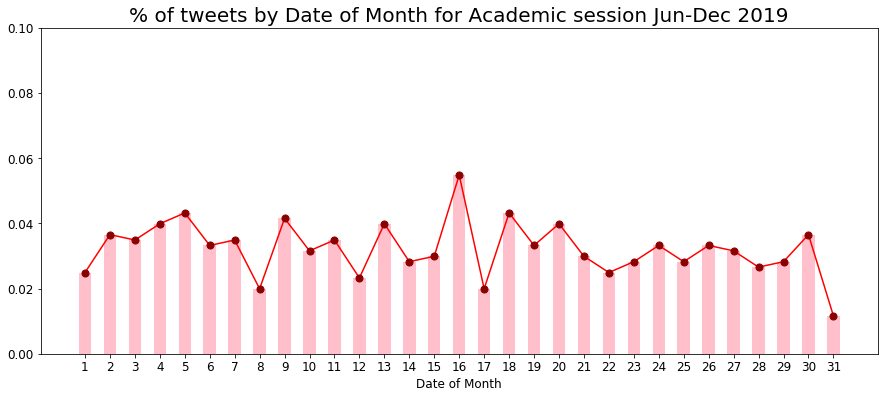

In [21]:
fig, axes = plt.subplots(figsize=(15,6))

data = df_2019["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month for Academic session Jun-Dec 2019')

plt.show()

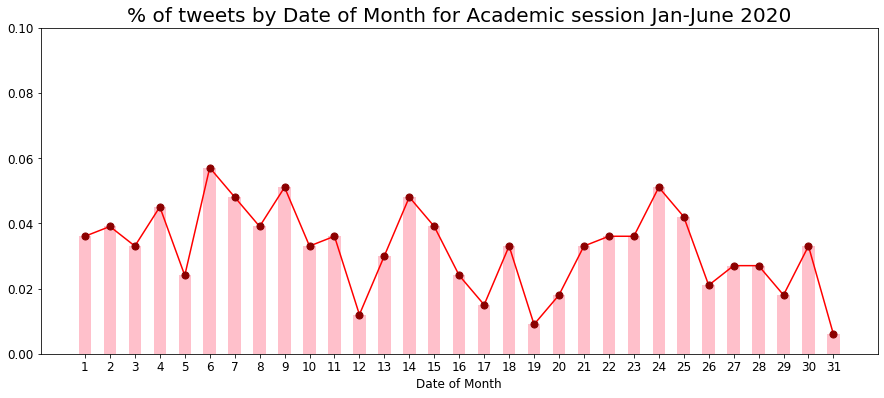

In [22]:
fig, axes = plt.subplots(figsize=(15,6))

data = df_2020["dayOfMonth"].value_counts(normalize=True).sort_index()
axes.bar(data.index, data, color='pink', width=0.5, zorder=0)
axes.plot(data.index, data, color='red', zorder=1)
axes.scatter(data.index, data, s=50, color='darkred', zorder=2)

axes.set_xlabel('Date of Month')
axes.set_xticks(np.arange(1, 32))
axes.set_xticklabels([str(val) for val in np.arange(1, 32)])
axes.set_ylim(0, 0.1)
axes.set_title('% of tweets by Date of Month for Academic session Jan-June 2020')

plt.show()

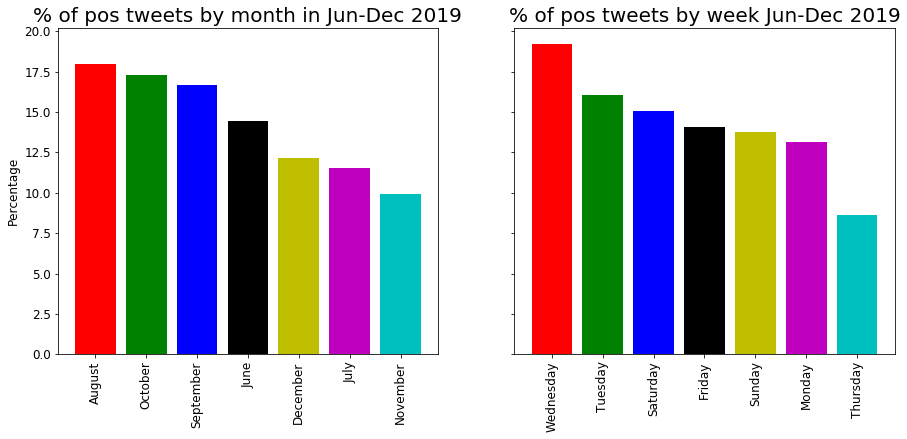

In [29]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2019 = df_2019[df_2019.Sentiment == 'Positive']
data = pos_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jun-Dec 2019')

data = pos_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

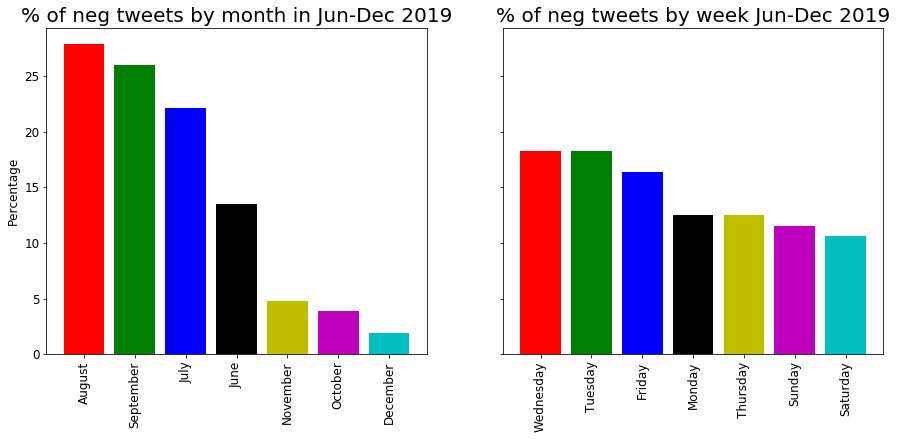

In [30]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2019 = df_2019[df_2019.Sentiment == 'Negative']
data = neg_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of neg tweets by month in Jun-Dec 2019')

data = neg_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of neg tweets by week Jun-Dec 2019')

plt.show()

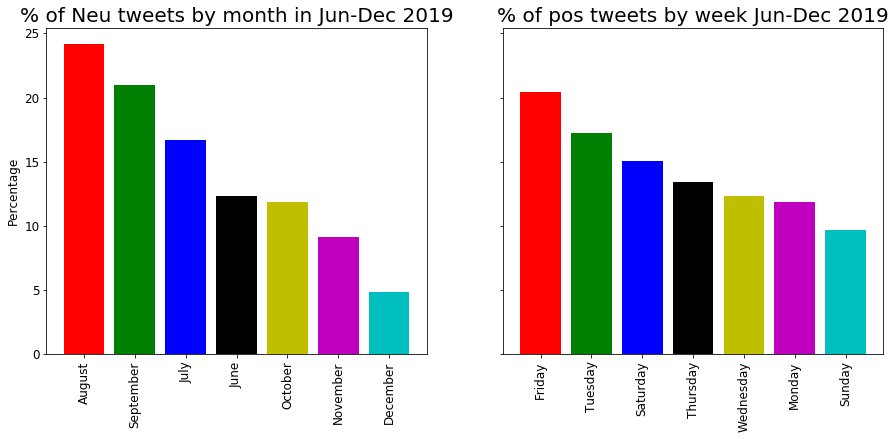

In [31]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neu_2019 = df_2019[df_2019.Sentiment == 'Neutral']
data = neu_2019["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neu tweets by month in Jun-Dec 2019')

data = neu_2019["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jun-Dec 2019')

plt.show()

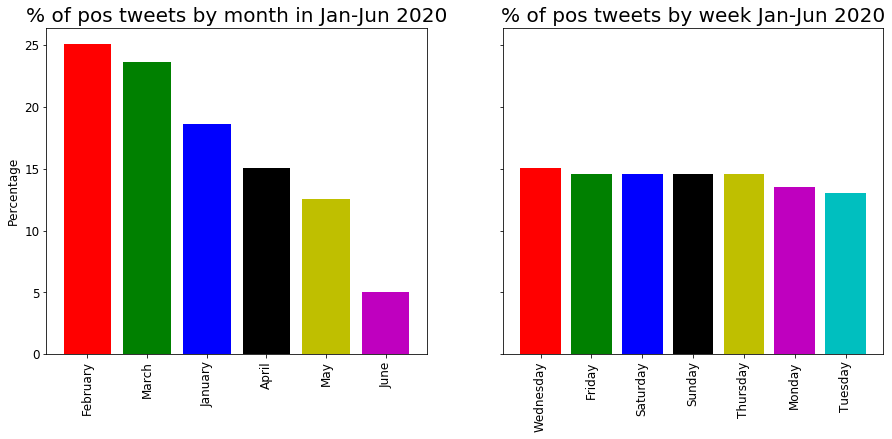

In [32]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
pos_2020 = df_2020[df_2020.Sentiment == 'Positive']
data = pos_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of pos tweets by month in Jan-Jun 2020')

data = pos_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of pos tweets by week Jan-Jun 2020')

plt.show()

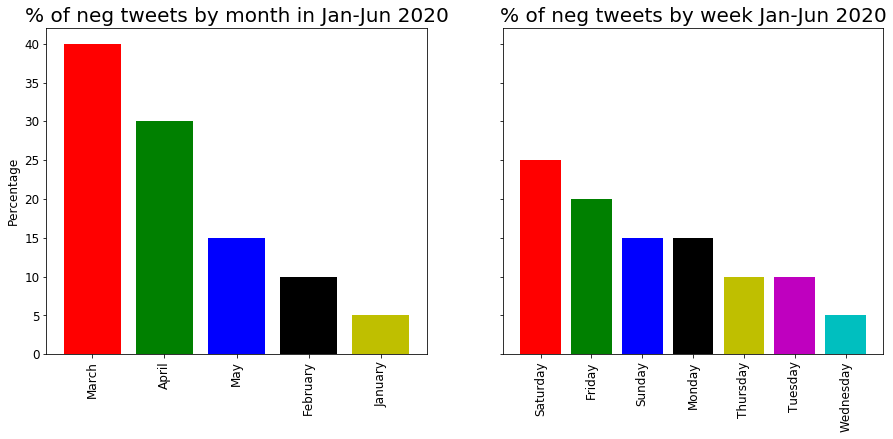

In [33]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neg_2020 = df_2020[df_2020.Sentiment == 'Negative']
data = neg_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of neg tweets by month in Jan-Jun 2020')

data = neg_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of neg tweets by week Jan-Jun 2020')

plt.show()

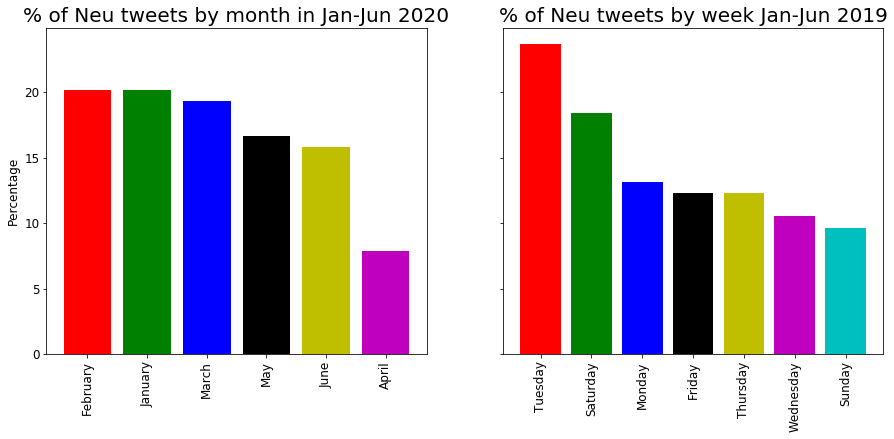

In [34]:
fig, [axes1, axes2] = plt.subplots(1, 2, figsize=(15,6), sharey=True)
neu_2020 = df_2020[df_2020.Sentiment == 'Neutral']
data = neu_2020["monthName"].value_counts(normalize=True)

axes1.bar(data.index, data*100, color=my_colors)
axes1.set_xticklabels(data.index, rotation=90)
axes1.set_ylabel('Percentage')
axes1.set_title('% of Neu tweets by month in Jan-Jun 2020')

data = neu_2020["dayName"].value_counts(normalize=True)
axes2.bar(data.index, data*100, color=my_colors)
axes2.set_xticklabels(data.index, rotation=90)
axes2.set_title('% of Neu tweets by week Jan-Jun 2019')

plt.show()

In [35]:
wordfreq = {}
for sentence in df['Text_lemmatized_str']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [36]:
import operator
sorted_wordfreq=sorted(wordfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_wordfreq

[('pesu', 418),
 ('pe', 395),
 ('university', 373),
 ('admission', 137),
 ('student', 127),
 ('pesuniversity', 126),
 ('u', 97),
 ('bangalore', 75),
 ('pls', 67),
 ('like', 64),
 ('day', 60),
 ('th', 59),
 ('program', 57),
 ('first', 55),
 ('india', 49),
 ('engineering', 48),
 ('time', 46),
 ('r', 46),
 ('college', 46),
 ('team', 45),
 ('campus', 45),
 ('sir', 43),
 ('direct', 43),
 ('learning', 43),
 ('one', 42),
 ('year', 42),
 ('bengaluru', 42),
 ('da', 40),
 ('dont', 38),
 ('great', 38),
 ('held', 38),
 ('know', 36),
 ('nee', 36),
 ('education', 36),
 ('workshop', 36),
 ('people', 35),
 ('biggbosstamil', 35),
 ('nerpada', 34),
 ('talk', 34),
 ('management', 34),
 ('event', 33),
 ('today', 32),
 ('opportunity', 32),
 ('go', 30),
 ('kavin', 30),
 ('member', 29),
 ('new', 29),
 ('dr', 28),
 ('faculty', 28),
 ('good', 27),
 ('call', 27),
 ('science', 27),
 ('also', 26),
 ('n', 26),
 ('last', 26),
 ('law', 25),
 ('la', 25),
 ('open', 25),
 ('get', 24),
 ('nu', 24),
 ('indian', 24),
 ('m

In [37]:
df['hashtags'].str.replace('[\[,\]]', '')


0                            'SuriyaFCWarnsBJPnADMKhttps'
1                     'SuriyaFCWarnsBJPnADMK' 'Kadamboor'
2                                                        
3                                        'BiggBossTamil3'
4                                                        
10                                                       
11                                                       
12                                                       
13                                                       
14                                                       
20                                                'Smule'
21                                                       
22                                                       
23                                                       
24                                                       
30                                                       
31                                                       
32            

In [38]:
hashtagfreq = {}
for sentence in df['hashtags']:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in hashtagfreq.keys():
            hashtagfreq[token] = 1
        else:
            hashtagfreq[token] +=1

In [39]:
sorted_hashtag=sorted(hashtagfreq.items(),key=operator.itemgetter(1),reverse=True)
sorted_hashtag

[('[', 935),
 (']', 935),
 ("'", 768),
 (',', 448),
 ("'BiggBossTamil3", 24),
 ("'PESUniversity", 21),
 ("'PES", 20),
 ("'Admission", 13),
 ("'admission", 10),
 ("'UNIVERSITY", 9),
 ("'cheran", 8),
 ("'pesuniversity", 8),
 ("'PESUOpenHouse", 8),
 ("'Smule", 7),
 ("'PESU", 6),
 ("'Losliya", 6),
 ("'Kavin", 6),
 ("'Bangalore", 6),
 ("'enlighteninghumanlives", 6),
 ("'Direct", 6),
 ("'BiggBossTamil", 5),
 ("'kavin", 5),
 ("'hackathon", 5),
 ("'educationpic", 5),
 ("'thankyouheroes", 5),
 ("'bangalore", 4),
 ("'LearningForLifepic", 4),
 ("'PESSAT", 4),
 ("'038", 4),
 ("'Aatmatrisha", 4),
 ("'management", 4),
 ("'technology", 4),
 ("'Sherin", 3),
 ("'HourOfCode", 3),
 ("'Bengaluru", 3),
 ("'RT", 3),
 ("'education", 3),
 ("'Engineering", 3),
 ("'knowledgetribe", 3),
 ("'tatacrucible", 3),
 ("'campusquiz", 3),
 ("'tccq2020", 3),
 ("'pesuclubspic", 3),
 ("'campushiring", 3),
 ("'COVID19", 3),
 ("'lawschool", 3),
 ("'admissions", 3),
 ("'Management", 3),
 ("'DMKYouthWingSecretary", 2),
 ("'kana

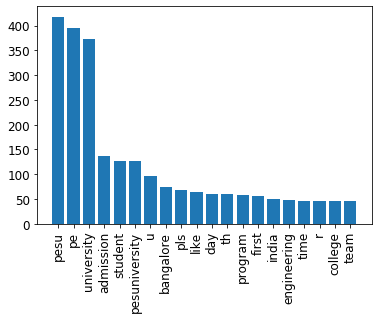

In [40]:
most_freqword = sorted_wordfreq[0:20]
plt.bar(range(len(most_freqword)), [val[1] for val in most_freqword], align='center')
plt.xticks(range(len(most_freqword)), [val[0] for val in most_freqword])
plt.xticks(rotation=90)
plt.show()

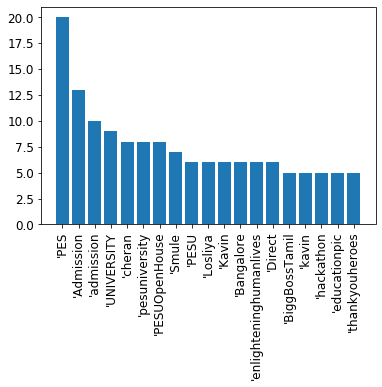

In [41]:
most_freqht = sorted_hashtag[6:25]
plt.bar(range(len(most_freqht)), [val[1] for val in most_freqht], align='center')
plt.xticks(range(len(most_freqht)), [val[0] for val in most_freqht])
plt.xticks(rotation=90)
plt.show()